In [1]:
# Prepare dataset
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
import math

In [5]:
# Load dataset
insurance = pd.read_csv('insurance.csv')
# Melihat 5 baris teratas dari data.
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Mengetahui jumlah kolom dan baris dari data.
# Data tersebut mempunyai 7 kolom (features) dengan 1338 baris.
insurance.shape

(1338, 7)

In [7]:
#Melihat info data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Mencari dan menangani missing values.
# Ternyata datanya sudah tidak ada missing values.
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# cek duplikat data
print('Number of duplicates in Insurance dataset:', insurance.duplicated().sum())

Number of duplicates in Insurance dataset: 1


In [11]:
# Drop data duplikat dan menamakan data baru dengan insurance_df
insurance_df = insurance.drop(insurance[insurance.duplicated()].index)

In [12]:
# Mengetahui jumlah kolom dan baris dari data insurance_df
# Data tersebut mempunyai 7 kolom (features) dengan 1337 baris.
insurance_df.shape

(1337, 7)

In [56]:
# Rata-rata umur pengguna
Rata2_umur_pengguna = round (pd.Series.mean(insurance['age']))
Rata2_umur_pengguna

39

In [15]:
# BMI mana yang lebih tinggi, seseorang perokok atau non perokok?
BMI = insurance_df.groupby(['smoker']).agg({'bmi':['mean']})
BMI.reset_index()

,smoker,bmi
,,mean
0,no,30.651853
1,yes,30.708449


In [18]:
# rata-rata tagihan kesehatan perokok atau non perokok
tagihan = insurance_df.groupby(['smoker']).agg({'charges':['mean']})
tagihan.reset_index()

,smoker,charges
,,mean
0,no,8440.660307
1,yes,32050.231832


In [17]:
# variansi tagihan kesehatan perokok dan non perokok 
variansi_smoker = round(insurance_df[insurance_df["smoker"] == "yes"].std()['charges']**2,2)
variansi_nonsmoker= round(insurance_df[insurance_df["smoker"] == "no"].std()['charges']**2,2)
print(variansi_smoker)
print(variansi_nonsmoker)

133207311.21
35915734.97


<ipython-input-17-64c1319c902a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variansi_smoker = round(insurance_df[insurance_df["smoker"] == "yes"].std()['charges']**2,2)
<ipython-input-17-64c1319c902a>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variansi_nonsmoker= round(insurance_df[insurance_df["smoker"] == "no"].std()['charges']**2,2)


In [24]:
# tagihan kesehatan perokok dan non perokok apabila BMI nya diatas 25
kriteria_smoker = (insurance_df["smoker"] == "yes") & (insurance_df["bmi"] > 25) 
tagihan_smoker = insurance_df[kriteria_smoker].mean()['charges']
kriteria_nonsmoker = (insurance_df["smoker"] == "no") & (insurance_df["bmi"] > 25) 
tagihan_nonsmoker = insurance_df[kriteria_nonsmoker].mean()['charges']
print(tagihan_smoker)
print(tagihan_nonsmoker)

35116.90965694064
8637.614898471871


<ipython-input-24-88a697a1438a>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tagihan_smoker = insurance_df[kriteria_smoker].mean()['charges']
<ipython-input-24-88a697a1438a>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tagihan_nonsmoker = insurance_df[kriteria_nonsmoker].mean()['charges']


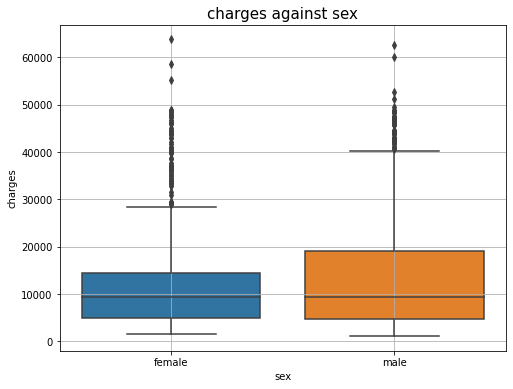

In [25]:
# Gender  yang memiliki tagihan kesehatan paling tinggi
# plot graph
plt.figure(figsize=(8,6))
ax = sns.boxplot(x="sex", y="charges", data=insurance_df)
plt.title("charges against sex", fontsize=15)
plt.grid()
plt.show()

In [26]:
# rata-rata tagihan kesehatan laki-laki dan perempuan
tagihan_sex = insurance_df.groupby(['sex']).agg({'charges':['mean']})
tagihan_sex.reset_index()

,sex,charges
,,mean
0,female,12569.578844
1,male,13974.998864


In [27]:
# jumlah tagihan setiap region 
insurance_df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [28]:
# Proporsi setiap region 
n_data = 1337
n_northeast = 324
n_northwest = 324
n_southeast = 364
n_southwest = 325
p_northeast = n_northeast/ n_data
p_northwest= n_northwest/ n_data
p_southeast = n_southeast / n_data
p_southwest = n_southwest/n_data

print(f"Proporsi dari region northeast adalah {p_northeast}")
print(f"Proporsi dari  region northwest adalah {p_northwest}")
print(f"Proporsi dari region southeast adalah {p_southeast}")
print(f"Proporsi dari region southwest adalah {p_southwest}")

Proporsi dari region northeast adalah 0.2423335826477188
Proporsi dari  region northwest adalah 0.2423335826477188
Proporsi dari region southeast adalah 0.27225130890052357
Proporsi dari region southwest adalah 0.24308152580403888


In [29]:
# Jumlah perokok atau non perokok?
insurance_df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [30]:
# proporsi perokok dan non perokok
n_smoker = 274
n_nonsmoker = 1063
n_data = 1337

p_smoker = n_smoker/n_data
p_nonsmoker = n_nonsmoker/n_data

print(f"Proporsi dari perokok adalah {p_smoker}")
print(f"Proporsi dari non perokok adalah {p_nonsmoker}")

Proporsi dari perokok adalah 0.2049364248317128
Proporsi dari non perokok adalah 0.7950635751682872


In [31]:
# data perokok dan tidak dari laki-laki dan perempuan
insurance_df.groupby(["smoker", "sex"]).agg({"sex":"count"})

sex
smoker sex        
no     female  547
       male    516
yes    female  115
       male    159

In [33]:
# Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok
n_female_smoker = 115
n_female_nonsmoker = 547
n_male_smoker = 159
n_male_nonsmoker = 516

n_perokok = n_female_smoker + n_male_smoker
p_female_jika_smoker= n_female_smoker / n_perokok
print(f"Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok : {p_female_jika_smoker:.2f}")

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok : 0.42


In [34]:
# peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok
p_male_jika_smoker= n_male_smoker / n_perokok

print(f"Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok : {p_male_jika_smoker:.2f}")

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok : 0.58


In [39]:
# Peluang seseorang dengan BMI diatas 25 (tinggi) mendapatkan tagihan kesehatan diatas 16.7k (banyak)

#jumlah tagihan banyak
tagihan_banyak = insurance_df[insurance_df["charges"] > 16700].count()['charges']

#jumlah bmi tinggi yang tagihannya banyak
kriteria_1 = (insurance_df["bmi"] >25) & (insurance_df["charges"] > 16700) 
bmi_tinggi = insurance_df[kriteria_1].count()['bmi']

bmi_tinggi/tagihan_banyak

0.8473053892215568

In [40]:
# Peluang seorang perokok dengan BMI diatas 25 (tinggi) mendapatkan tagihan kesehatan diatas 16.7k (banyak)
# jumlah tagihan banyak dan bmi tinggi
kriteria_2 = (insurance_df["bmi"] > 25) & (insurance_df["charges"] > 16700) 
jumlah_tagihan = insurance_df[kriteria_2].count()['bmi']

#jumlah perokok yang tagihannya banyak dan bmi tinggi
kriteria_3 = (insurance_df["bmi"] > 25) & (insurance_df["charges"] > 16700) & (insurance_df["smoker"] == "yes") 
jumlah_perokok = insurance_df[kriteria_3].count()['bmi']

jumlah_perokok/jumlah_tagihan

0.7597173144876325

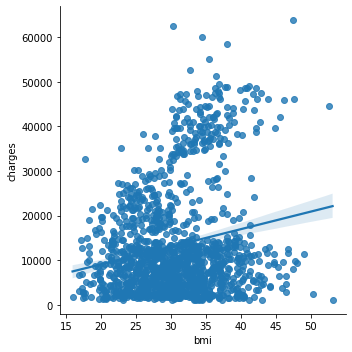

In [44]:
# Korelasi BMI dengan tagihan kesehatan
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_df)

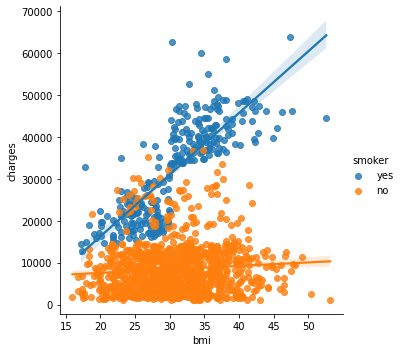

In [45]:
# Korelasi BMI dengan tagihan kesehatan untuk perokok dan non perokok
ax = sns.lmplot(x = 'bmi', y = 'charges', data=insurance_df, hue='smoker')

In [47]:
#Apakah Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
# Hipotesis
# H_0 : Tagihan kesehatan perokok sama dengan tagihan kesehatan non perokok 
# H_1 : Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok  

charges_smokers =insurance_df[insurance_df["smoker"] == "yes"]["charges"]
charges_nonsmokers = insurance_df[insurance_df["smoker"] == "no"]["charges"]
stat, p = ttest_ind(charges_smokers , charges_nonsmokers , equal_var=False, alternative='greater') 

# Uji statistik
print('Statistics = %.4f, p = %.4f' % (stat, p)) 

Statistics = 32.7423, p = 0.0000


In [49]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Tagihan kesehatan perokok sama dengan tagihan kesehatan non perokok  (Gagal tolak H0)') 
else:
    print('Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok (Tolak H0)')

Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok (Tolak H0)


In [50]:
# 	Jumlah, variansi dan rata-rat tagihan kesehatan perokok dan non perokok 
rataan_smoker = round(insurance_df[insurance_df["smoker"] == "yes"].mean()['charges'],2)
rataan_nonsmoker= round(insurance_df[insurance_df["smoker"] == "no"].mean()['charges'],2)
variansi_smoker = round(insurance_df[insurance_df["smoker"] == "yes"].std()['charges']**2,2)
variansi_nonsmoker= round(insurance_df[insurance_df["smoker"] == "no"].std()['charges']**2,2)
insurance_df['smoker'].value_counts()

<ipython-input-50-d8250b24d02f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rataan_smoker = round(insurance_df[insurance_df["smoker"] == "yes"].mean()['charges'],2)
<ipython-input-50-d8250b24d02f>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rataan_nonsmoker= round(insurance_df[insurance_df["smoker"] == "no"].mean()['charges'],2)
<ipython-input-50-d8250b24d02f>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variansi_smoker = round(insurance_df[insurance_df["smoker"] == "yes"

no     1063
yes     274
Name: smoker, dtype: int64

In [51]:
#Apakah variansi tagihan kesehatan perokok dan non perokok sama
# Hipotesis
# H_0 : Variansi tagihan kesehatan perokok sama dengan tagihan kesehatan non perokok 
# H_1 : Variansi tagihan kesehatan perokok tidak sama dengan tagihan kesehatan non perokok  

# Menentukan rata-rata
rataan1 = rataan_smoker
rataan2 = rataan_nonsmoker

# Menentukan sample variance
s_x = variansi_smoker
s_y = variansi_nonsmoker

# Ukuran sampel dua kelompok
sample1 = 274
sample2 = 1063

# Hitung uji statistik
f_test=s_x/s_y
f_crit=stats.f.ppf(1-0.05, sample1-1, sample1-1)  
print("Dengan nilai uji statistik", f_test," dan nilai f_crit", f_crit )

Dengan nilai uji statistik 3.7088844575021653  dan nilai f_crit 1.2207303475523517


In [52]:
# Menentukan aturan keputusan
if f_test>f_crit:
  print("Tolak null hypothesis")
else:
  print("Terima null hypothesis")

Tolak null hypothesis


In [53]:
# Apakah tagihan kesehatan laki-laki lebih besar dari perempuan?
# Hipotesis
# H_0 : Tagihan kesehatan laki-laki sama dengan tagihan kesehatan perempuan 
# H_1 : Tagihan kesehatan laki-laki lebih besar daripada tagihan kesehatan perempuan 

charges_male =insurance_df[insurance_df["sex"] == "male"]["charges"]
charges_female = insurance_df[insurance_df["sex"] == "female"]["charges"]
stat, p = ttest_ind(charges_male , charges_female , equal_var=False, alternative='greater') 

# Uji statistik
print('Statistics = %.4f, p = %.4f' % (stat, p)) 

Statistics = 2.1275, p = 0.0168


In [54]:
alpha = 0.05
# Pengambilan Keputusan
if p > alpha:
    print('Gagal tolak H0') 
else:
    print('Tolak H0')

Tolak H0
